In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
cd /content/gdrive/My\ Drive/


/content/gdrive/My Drive


In [13]:
 cd XYZ/

/content/gdrive/My Drive/XYZ


In [104]:
import os
import csv      
import pandas as pd
file_path = os.getcwd() + '/sammf.csv'
data= pd.read_csv(file_path, sep=',') 

In [105]:
data.head(5)

,location
0,"Queensland, Australia"
1,Land of Liberty?
2,Mesquite Nevada
3,StrongIsland NY
4,South Florida


In [106]:
# del data1['id']
# del data1['full_text']
# del data1['label']

data.head(5)

,location
0,"Queensland, Australia"
1,Land of Liberty?
2,Mesquite Nevada
3,StrongIsland NY
4,South Florida


In [107]:

from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import numpy as np

In [108]:
data = data.dropna()
data

,location
0,"Queensland, Australia"
1,Land of Liberty?
2,Mesquite Nevada
3,StrongIsland NY
4,South Florida
...,...
293,"Brampton, Ontario"
294,"London, England"
295,"London, England"
296,"Montrose, Houston TX"


In [109]:
longitude = []
latitude = []
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city, timeout=None)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
for i in (data["location"]):
      
  if findGeocode(i) != None:
           
      loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
      latitude.append(loc.latitude)
      longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
  else:
      latitude.append(np.nan)
      longitude.append(np.nan)

data["Longitude"] = longitude
data["Latitude"] = latitude
  
data.head(5)

,location,Longitude,Latitude
0,"Queensland, Australia",144.584490,-22.164678
1,Land of Liberty?,-76.956380,38.938910
2,Mesquite Nevada,-114.067141,36.803564
3,StrongIsland NY,NaN,NaN
4,South Florida,-94.846426,37.167713


In [110]:
data = data.dropna()

In [111]:
data

,location,Longitude,Latitude
0,"Queensland, Australia",144.584490,-22.164678
1,Land of Liberty?,-76.956380,38.938910
2,Mesquite Nevada,-114.067141,36.803564
4,South Florida,-94.846426,37.167713
5,"Brampton, Ontario",-79.759934,43.685815
...,...,...,...
293,"Brampton, Ontario",-79.759934,43.685815
294,"London, England",-0.127647,51.507322
295,"London, England",-0.127647,51.507322
296,"Montrose, Houston TX",-95.390278,29.746552


In [112]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-akwpjnbu
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-akwpjnbu


In [113]:
# Map our scatter plot over worldmap
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

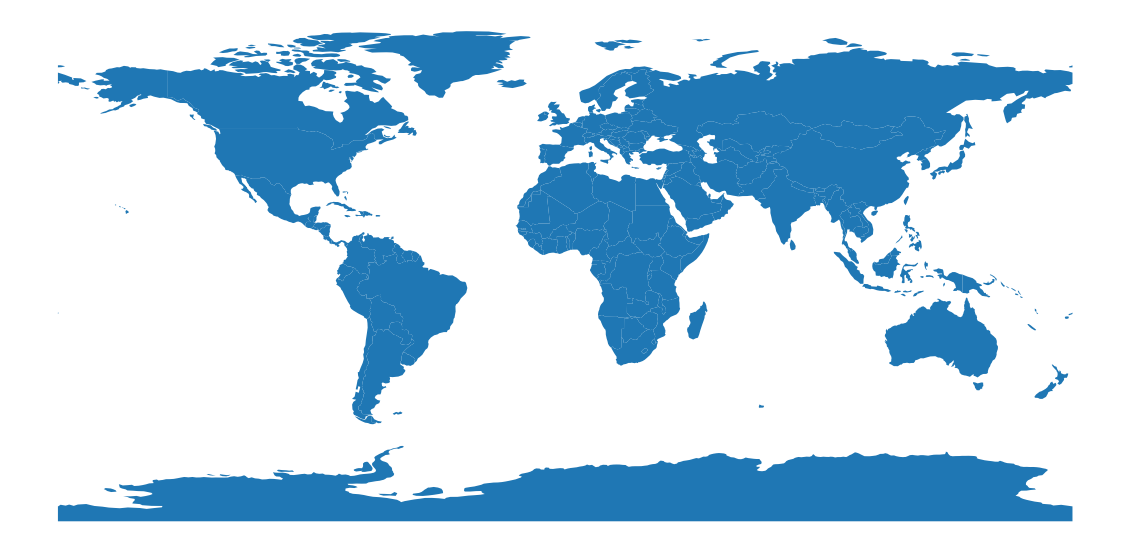

In [114]:
# World Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

In [115]:
# Overlap our clusters
g01 = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data['Longitude'],data['Latitude']))

In [116]:
g01

,location,Longitude,Latitude,geometry
0,"Queensland, Australia",144.584490,-22.164678,POINT (144.58449 -22.16468)
1,Land of Liberty?,-76.956380,38.938910,POINT (-76.95638 38.93891)
2,Mesquite Nevada,-114.067141,36.803564,POINT (-114.06714 36.80356)
4,South Florida,-94.846426,37.167713,POINT (-94.84643 37.16771)
5,"Brampton, Ontario",-79.759934,43.685815,POINT (-79.75993 43.68581)
...,...,...,...,...
293,"Brampton, Ontario",-79.759934,43.685815,POINT (-79.75993 43.68581)
294,"London, England",-0.127647,51.507322,POINT (-0.12765 51.50732)
295,"London, England",-0.127647,51.507322,POINT (-0.12765 51.50732)
296,"Montrose, Houston TX",-95.390278,29.746552,POINT (-95.39028 29.74655)


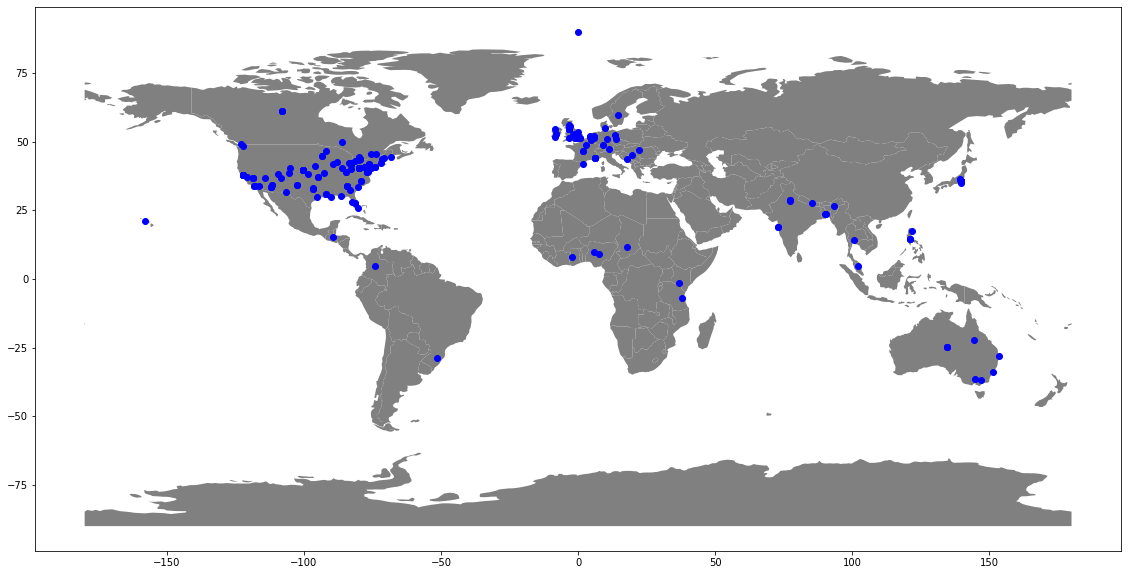

In [117]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,10))
world.plot(ax=ax, color='grey')
g01.plot(ax=ax, color='blue')
world.geometry.boundary.plot(color=None,edgecolor='grey',linewidth=0,ax=ax)


(7.220541490096537, 83.64513000000001)

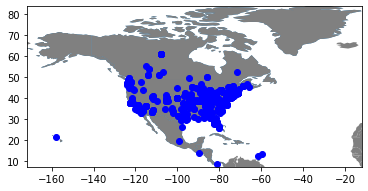

In [39]:
africa = world[world.continent == 'North America']
ax = africa.plot()
world.plot(ax=ax, color='grey')
g01.plot(ax=ax, color='blue')
world.geometry.boundary.plot(color=None,edgecolor='grey',linewidth=0,ax=ax)
minx, miny, maxx, maxy = africa.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)